# Notebook to investigate running problems

Current error message:

 Found Error: 01   Line: 321      Source: ROMS/Nonlinear/main3d.F
 Found Error: 01   Line: 298      Source: ROMS/Drivers/nl_roms.h, ROMS_run

 Blowing-up: Saving latest model state into  RESTART file
     REASON: MaxSpeed =  2.3E+01

  WRT_RST_NF90     - wrote re-start    fields (Index=1,2) in record = 1


In [1]:
import xarray as xr

In [11]:
# Check restart and history files
rst = xr.open_dataset('/Users/iriskeizer/Downloads/NorthSea4_rst.nc')
#his = xr.open_dataset('/Users/iriskeizer/Downloads/NorthSea4_his.nc')

In [2]:
river = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/timnorthsea8/forcing/Rivers_NorthSea8_smooth013_Dai2014_AnnualCycle_1993-2019.nc')


In [9]:
result = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/lateral forcing/NorthSea4 ORA20C/result.nc')


In [10]:
result

<xarray.Dataset>
Dimensions:  (time: 1320, eta_rho: 110, xi_rho: 122, s_rho: 30, eta_u: 110,
              xi_u: 121, xi_v: 122, eta_v: 109)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2009-12-16T12:00:00
  * eta_rho  (eta_rho) int64 0 1 2 3 4 5 6 7 ... 102 103 104 105 106 107 108 109
  * xi_rho   (xi_rho) int64 0 1 2 3 4 5 6 7 ... 114 115 116 117 118 119 120 121
  * s_rho    (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.08333 -0.05 -0.01667
  * eta_u    (eta_u) int64 0 1 2 3 4 5 6 7 8 ... 102 103 104 105 106 107 108 109
  * xi_v     (xi_v) int64 0 1 2 3 4 5 6 7 8 ... 114 115 116 117 118 119 120 121
  * eta_v    (eta_v) int64 0 1 2 3 4 5 6 7 8 ... 101 102 103 104 105 106 107 108
Dimensions without coordinates: xi_u
Data variables:
    temp     (time, eta_rho, xi_rho, s_rho) float32 ...
    salt     (time, eta_rho, xi_rho, s_rho) float32 ...
    u        (time, eta_u, xi_u, s_rho) float32 ...
    v        (time, eta_v, xi_v, s_rho) float32 ...
    zeta     (time, eta_rho, xi_rho) float32 ...
    ubar     (time, eta_u, xi_u) float32 ...
    vbar     (time, eta_v, xi_v) float32 ...

In [5]:
data = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ORA20C/forcing input/ora20c.nc')

In [8]:
data.where(data.time.dt.year > 1949, drop = True)

<xarray.Dataset>
Dimensions:    (time: 720, depth: 42, latitude: 34, longitude: 38)
Coordinates:
  * depth      (depth) float32 5.022 15.08 25.16 ... 5.051e+03 5.35e+03
  * time       (time) datetime64[ns] 1950-01-16T12:00:00 ... 2009-12-16T12:00:00
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 4.5 ... -3.5 -2.5 -1.5 -0.5
  * latitude   (latitude) float32 32.5 33.5 34.5 35.5 ... 62.5 63.5 64.5 65.5
Data variables:
    so         (time, depth, latitude, longitude) float32 nan nan ... nan nan
    thetao     (time, depth, latitude, longitude) float32 nan nan ... nan nan
    uo         (time, depth, latitude, longitude) float32 nan nan ... nan nan
    vo         (time, depth, latitude, longitude) float32 nan nan ... nan nan
    zos        (time, latitude, longitude) float32 nan nan ... -0.7391 -0.7102
Attributes:
    _CoordinateAxes:    time depth lat lon
    associate:          time depth lat lon
    interval_write:     monthly
    long_name:          Salinity
    offline_operation:  time average and spatial interpolation
    standard_name:      Salinity
    units:              psu

In [4]:
river.river_time[24:-120]

<xarray.DataArray 'river_time' (river_time: 720)>
array(['1950-01-15T00:00:00.000000000', '1950-02-15T00:00:00.000000000',
       '1950-03-15T00:00:00.000000000', ..., '2009-10-15T00:00:00.000000000',
       '2009-11-15T00:00:00.000000000', '2009-12-15T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * river_time  (river_time) datetime64[ns] 1950-01-15 1950-02-15 ... 2009-12-15
Attributes:
    long_name:  river runoff time

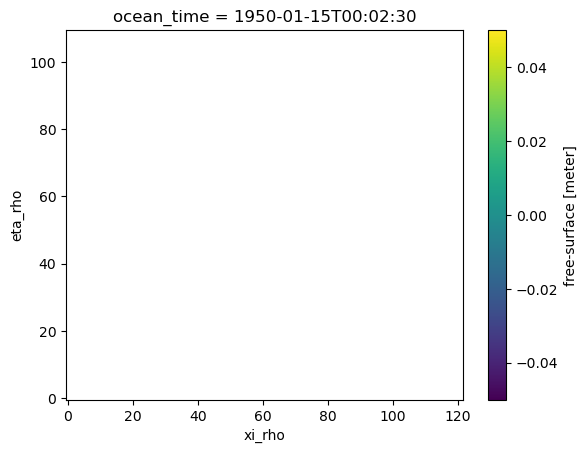

In [7]:
rst.zeta.plot()

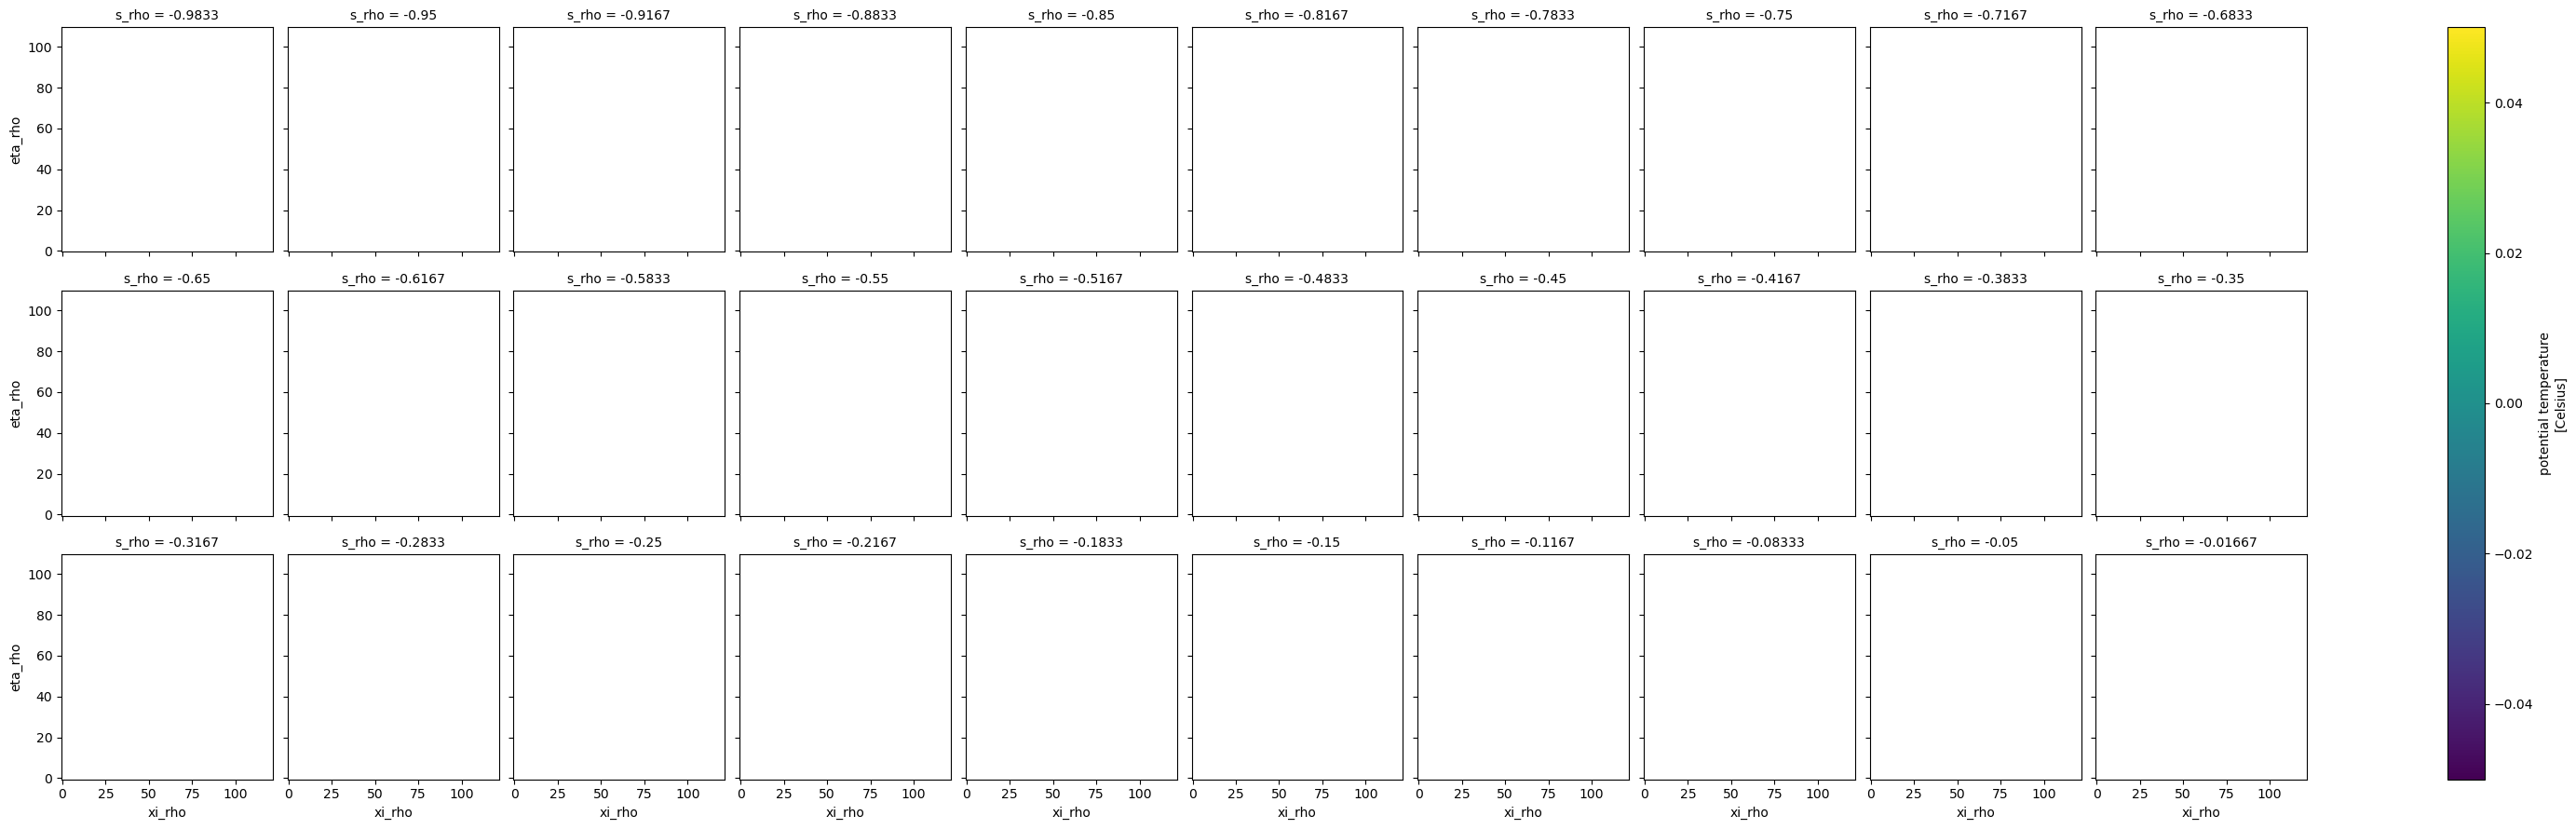

In [13]:
rst.temp.plot(col = 's_rho', col_wrap = 10)

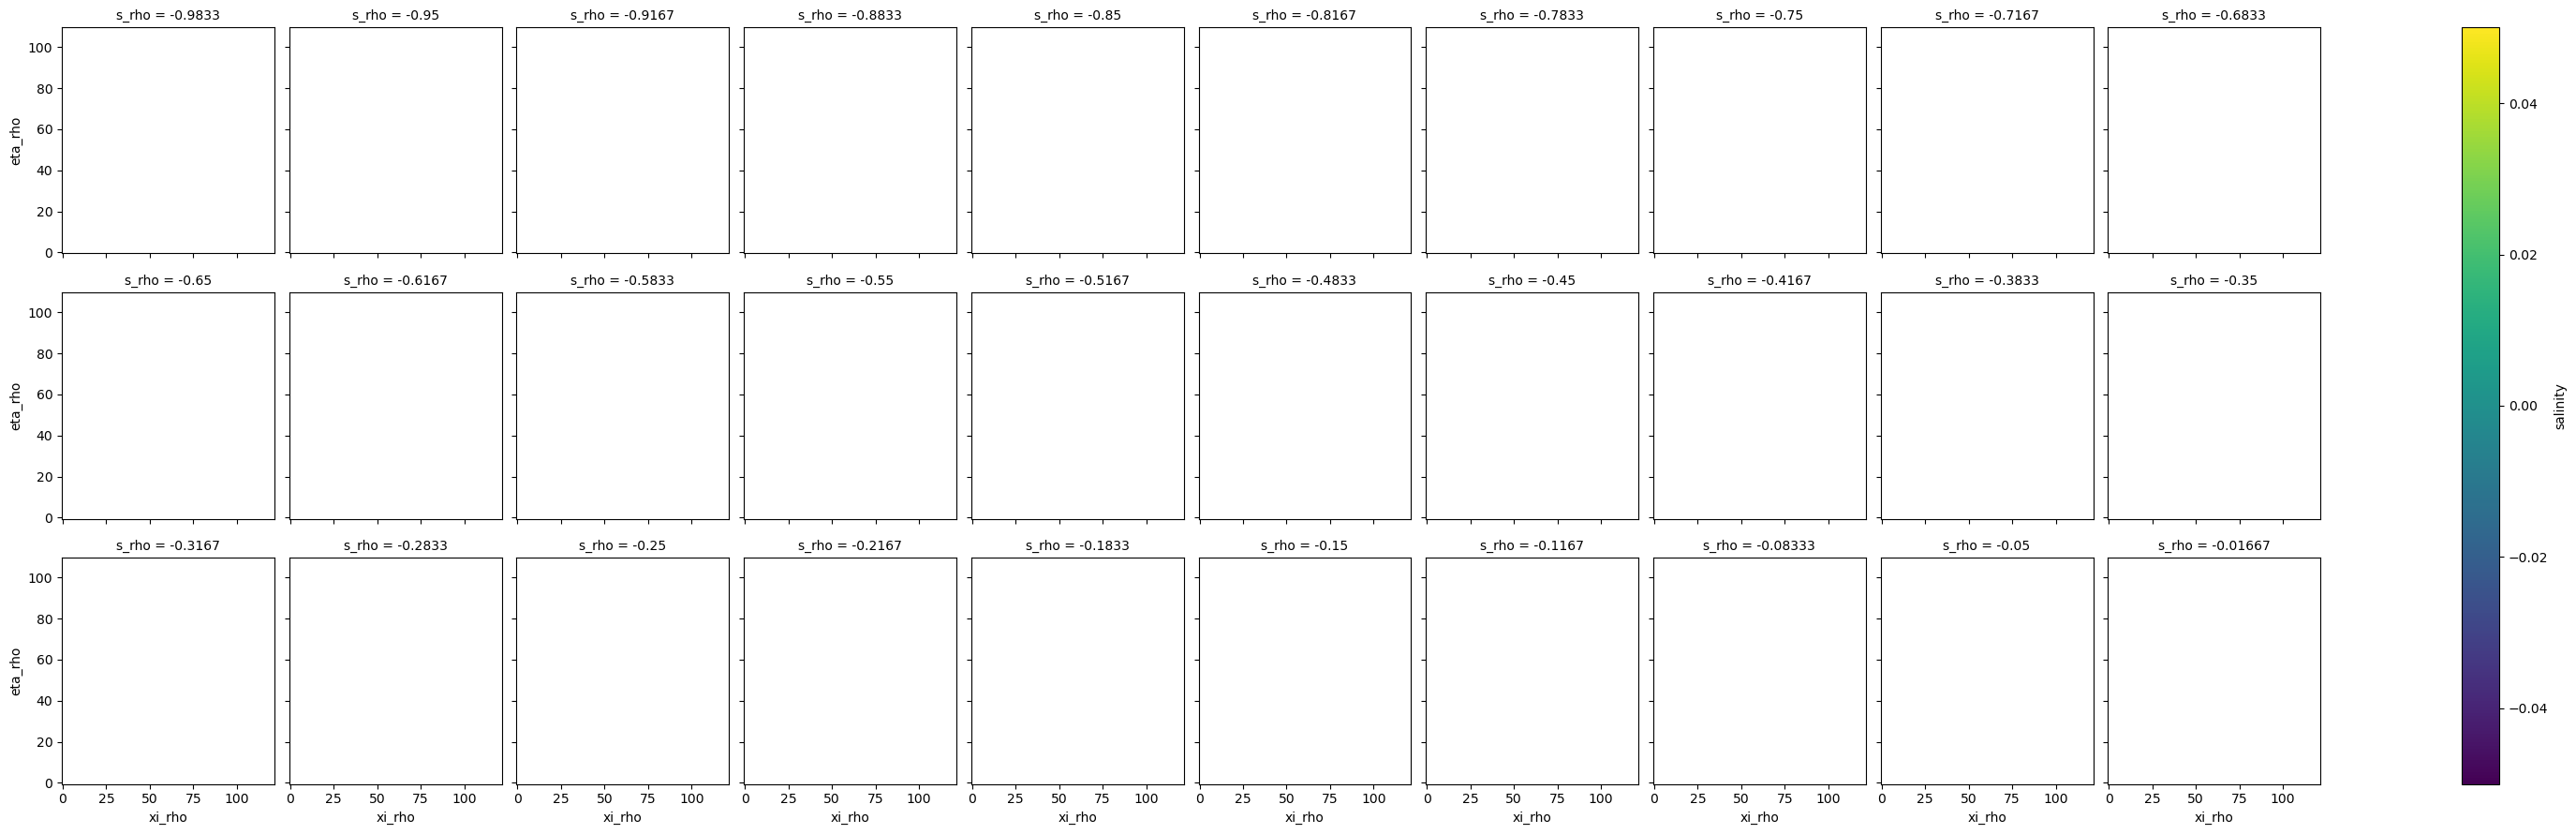

In [14]:
rst.salt.plot(col = 's_rho', col_wrap = 10)

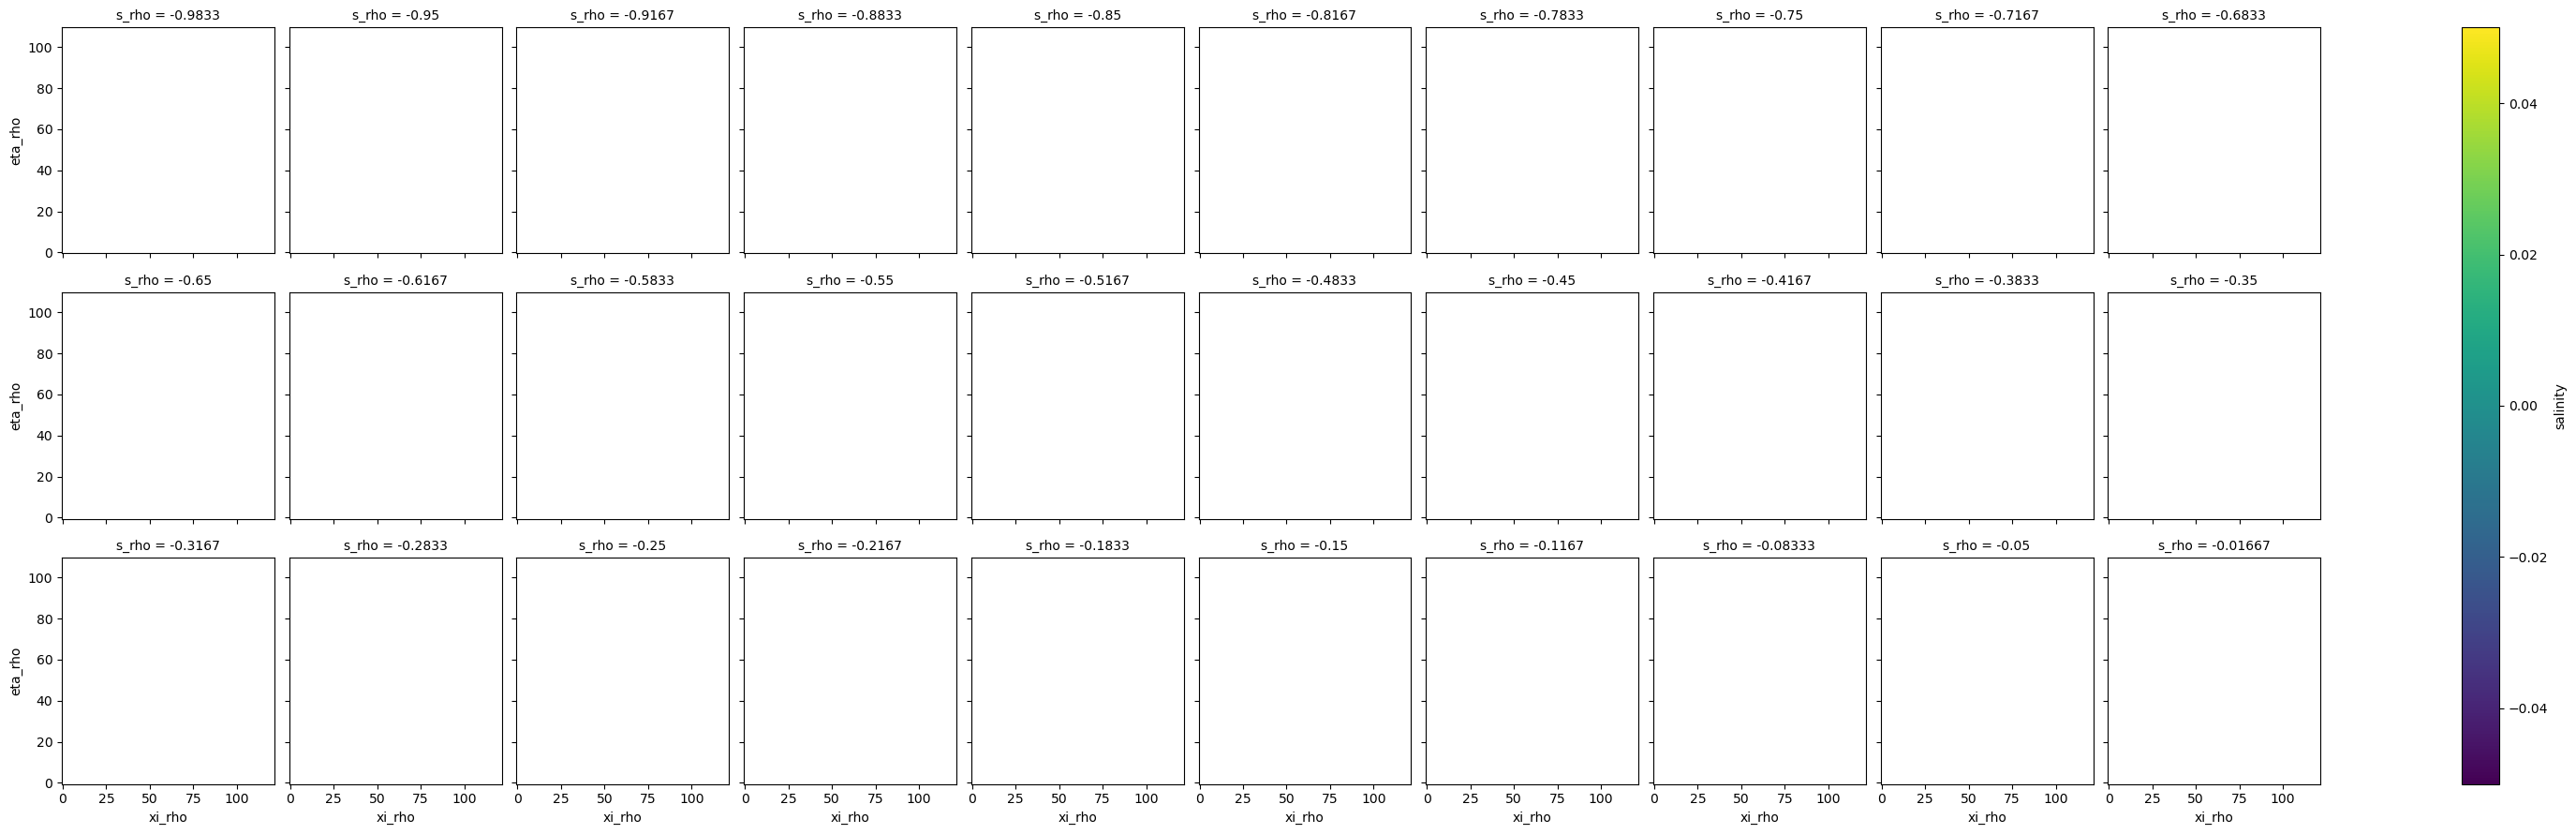

In [16]:
rst.u.plot(col = 's_rho', col_wrap = 10)

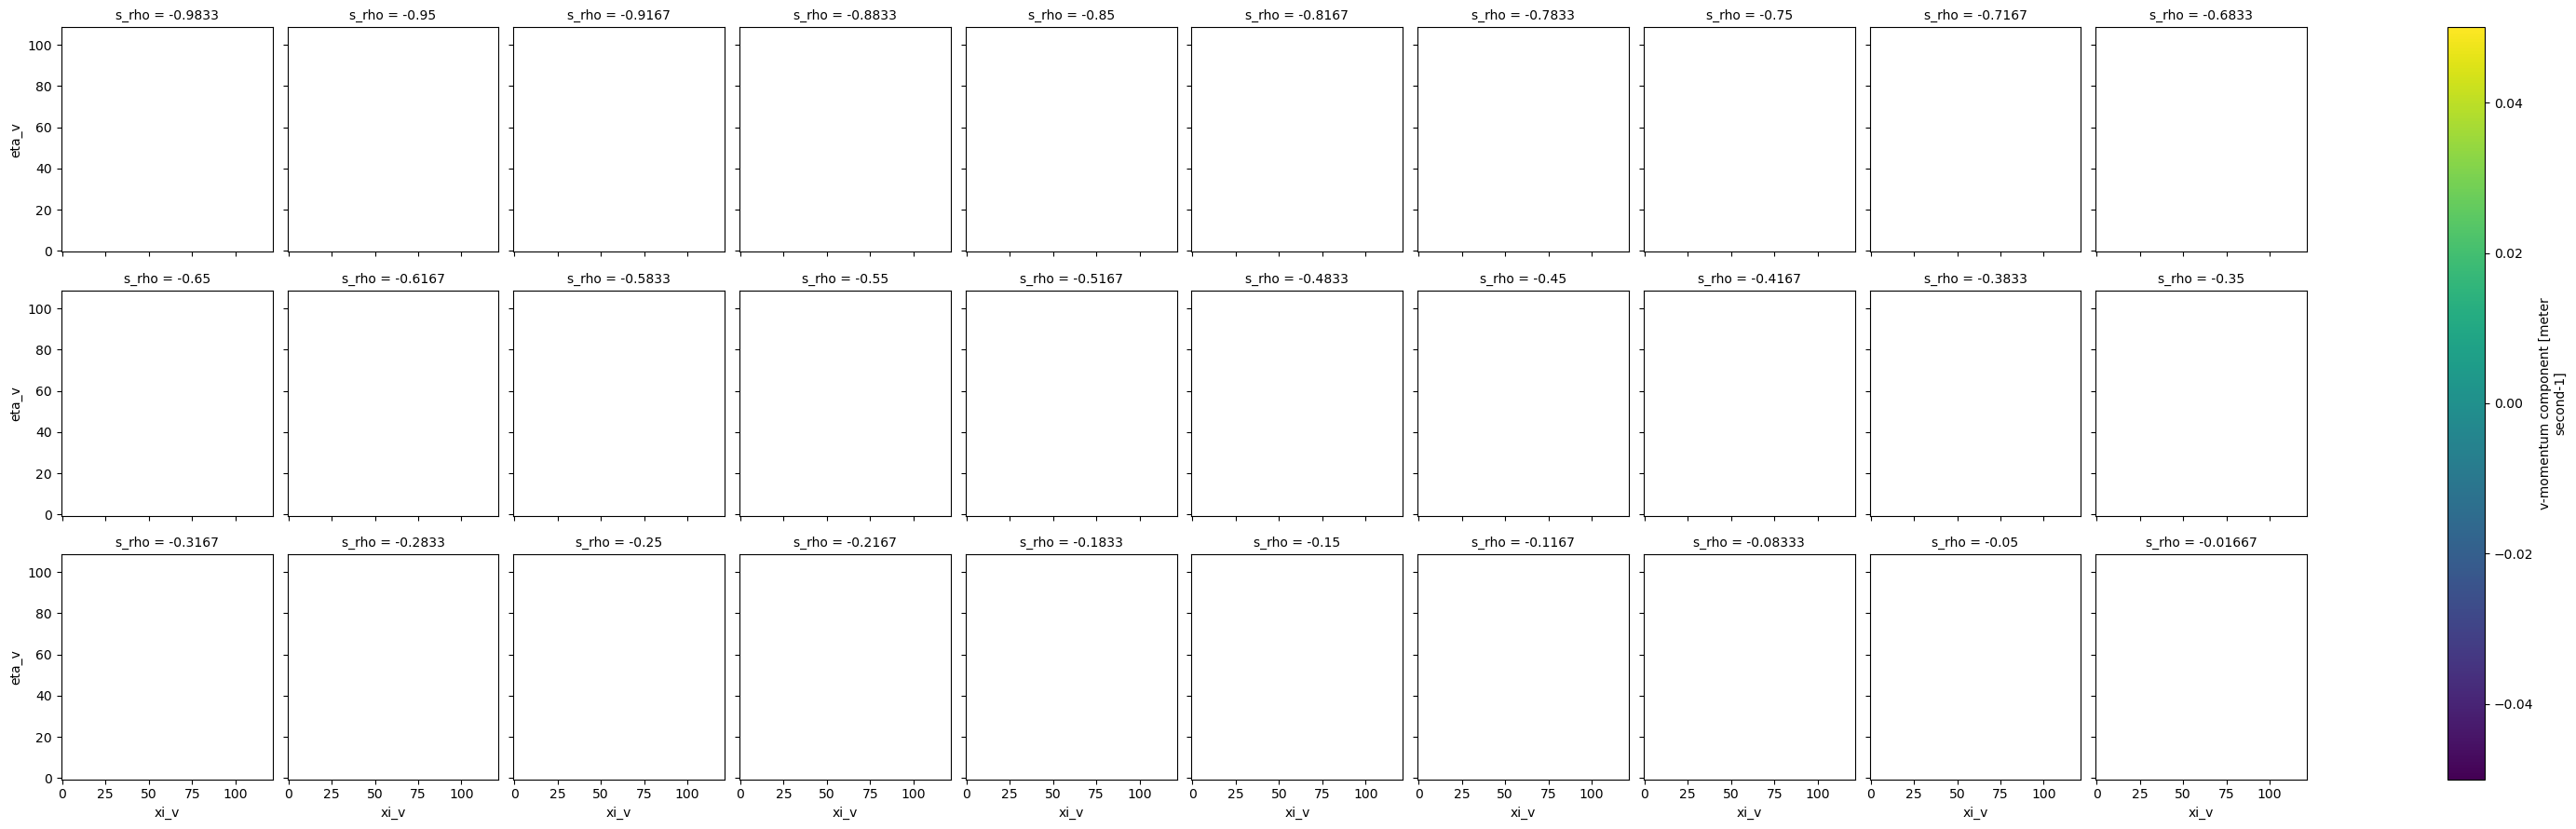

In [17]:
rst.v.plot(col = 's_rho', col_wrap = 10)

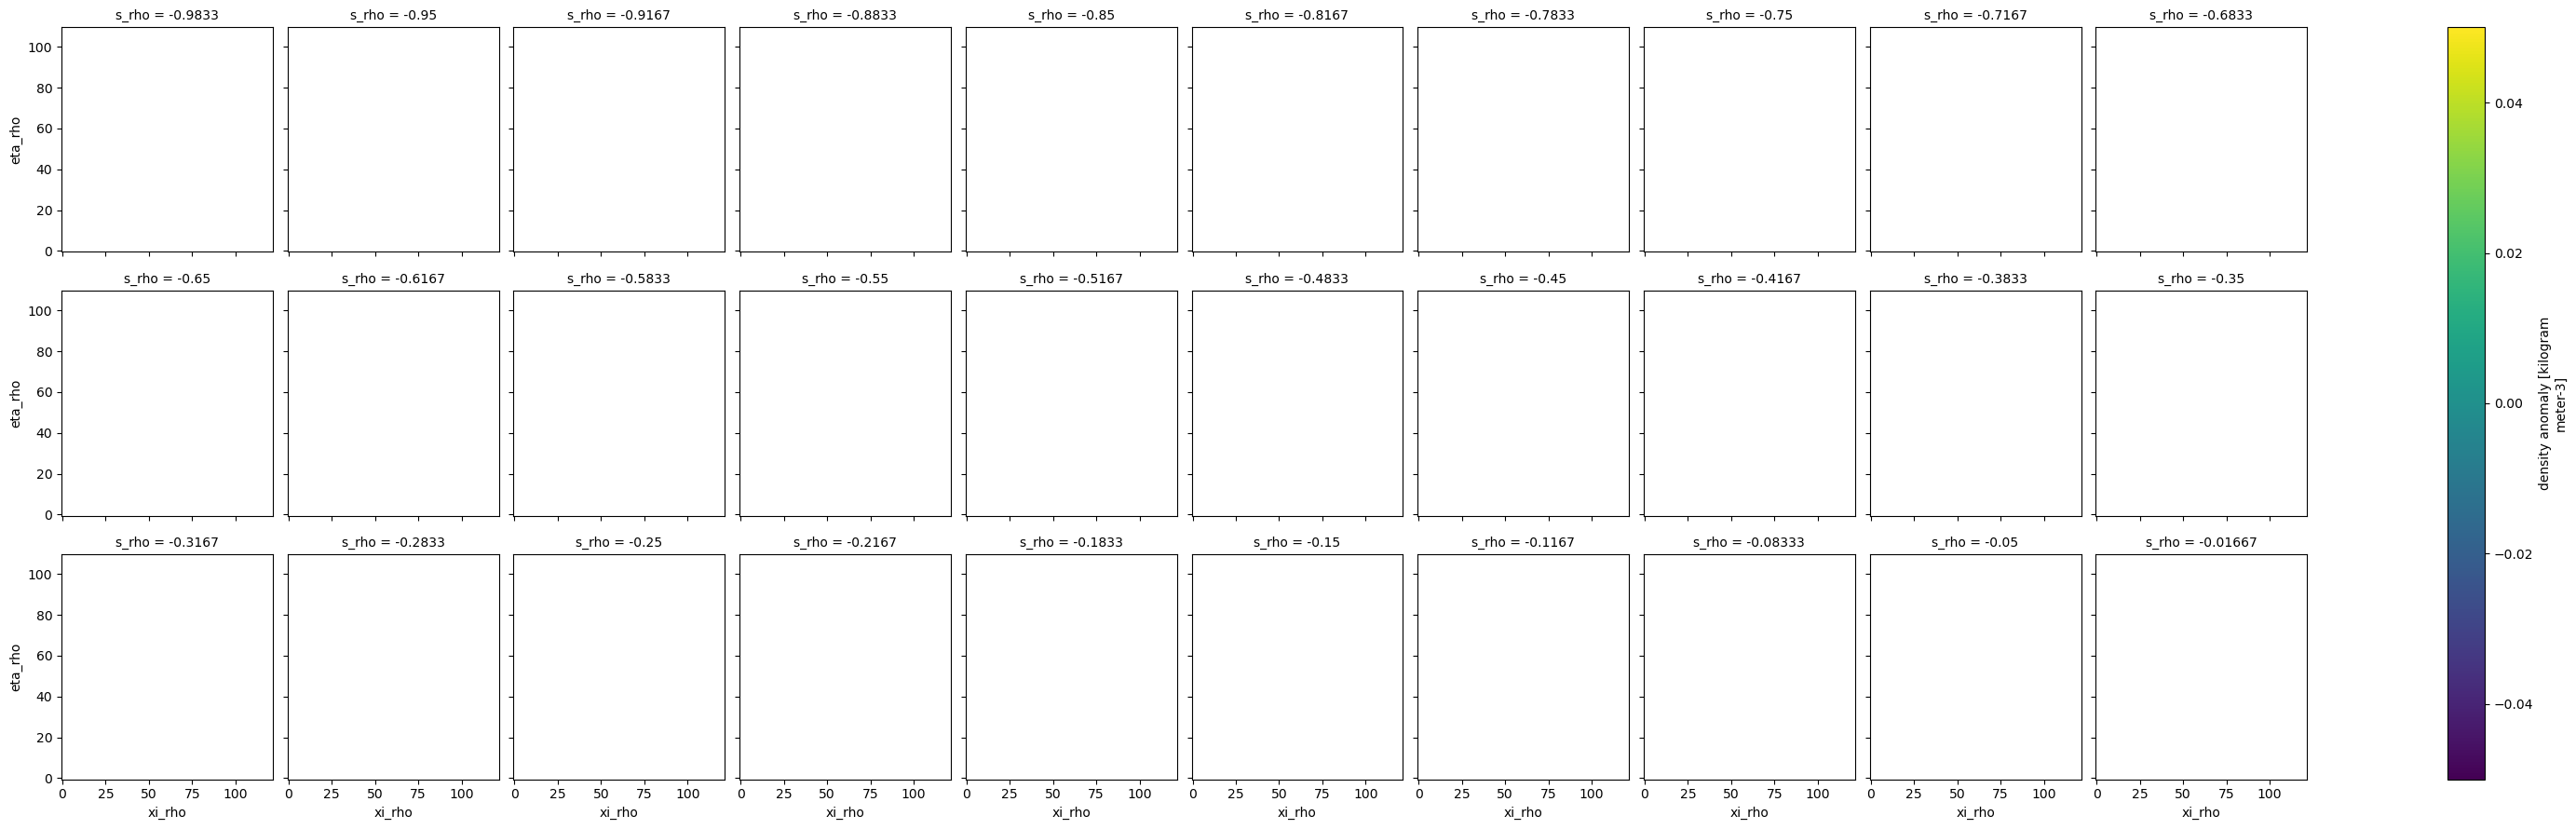

In [28]:
rst.rho.plot(col = 's_rho', col_wrap = 10)

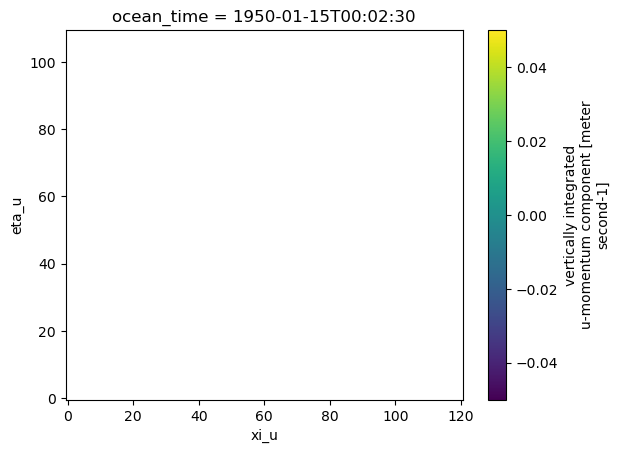

In [19]:
rst.ubar.plot()

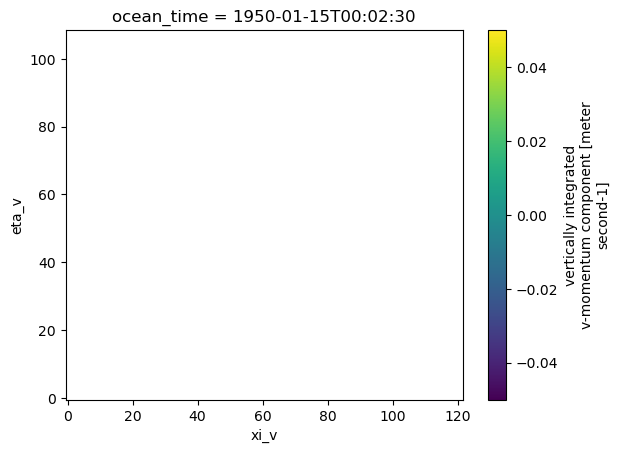

In [20]:
rst.vbar.plot()

In [21]:
rst

<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 30, s_w: 31, eta_rho: 110,
                    xi_rho: 122, eta_u: 110, xi_u: 121, eta_v: 109, xi_v: 122,
                    eta_psi: 109, xi_psi: 121, ocean_time: 1)
Coordinates:
  * s_rho          (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w            (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
    lon_rho        (eta_rho, xi_rho) float64 -19.88 -19.63 ... 9.631 9.877
    lat_rho        (eta_rho, xi_rho) float64 35.95 35.95 35.95 ... 61.91 61.91
    lon_u          (eta_u, xi_u) float64 -19.75 -19.51 -19.26 ... 9.508 9.754
    lat_u          (eta_u, xi_u) float64 35.95 35.95 35.95 ... 61.91 61.91 61.91
    lon_v          (eta_v, xi_v) float64 -19.88 -19.63 -19.39 ... 9.631 9.877
    lat_v          (eta_v, xi_v) float64 36.1 36.1 36.1 ... 61.82 61.82 61.82
    lon_psi        (eta_psi, xi_psi) float64 -19.75 -19.51 ... 9.508 9.754
    lat_psi        (eta_psi, xi_psi) float64 36.1 36.1 36.1 ... 61.82 61.82
  * ocean_time     (ocean_time) datetime64[ns] 1950-01-15T00:02:30
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/78)
    ntimes         int32 1031700
    ndtfast        int32 30
    dt             float64 150.0
    dtfast         float64 5.0
    dstart         datetime64[ns] 1950-01-01
    nHIS           int32 2880
    ...             ...
    salt           (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    rho            (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    Hsbl           (ocean_time, eta_rho, xi_rho) float64 -3.678 -3.678 ... nan
    AKv            (ocean_time, s_w, eta_rho, xi_rho) float64 ...
    AKt            (ocean_time, s_w, eta_rho, xi_rho) float64 ...
    AKs            (ocean_time, s_w, eta_rho, xi_rho) float64 ...
Attributes: (12/32)
    file:              output/run1/NorthSea4_rst.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS restart file
    title:             Extended North Sea, 0.25deg  Resolution, test
    var_info:          ../roms/ROMS/External/varinfo_2.yaml
    ...                ...
    compiler_command:  /sw/arch/Centos8/EB_production/2021/software/OpenMPI/4...
    compiler_flags:    -frepack-arrays -fallow-argument-mismatch  -fallow-arg...
    tiling:            008x004
    history:           ROMS/TOMS, Version 4.1, Wednesday - October 5, 2022 - ...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       NORTH_SEA4, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, ATM...

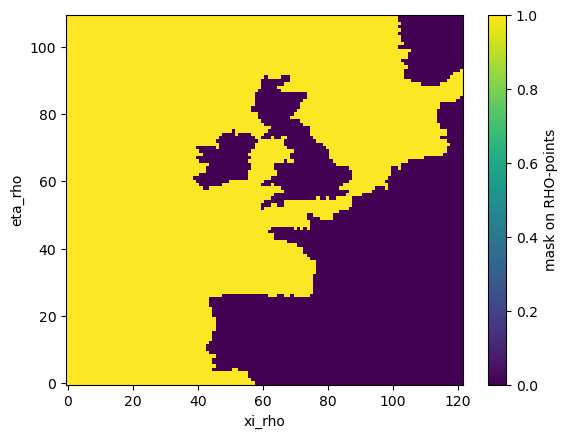

In [42]:
rst.mask_rho.plot()

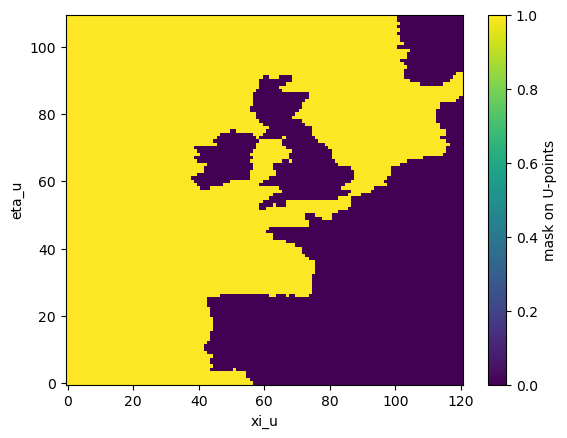

In [41]:
rst.mask_u.plot()

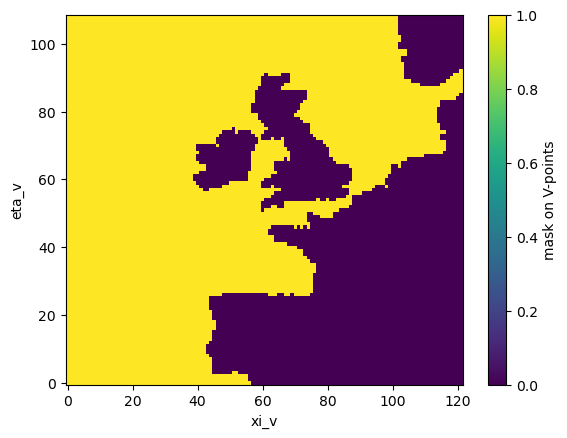

In [40]:
rst.mask_v.plot()

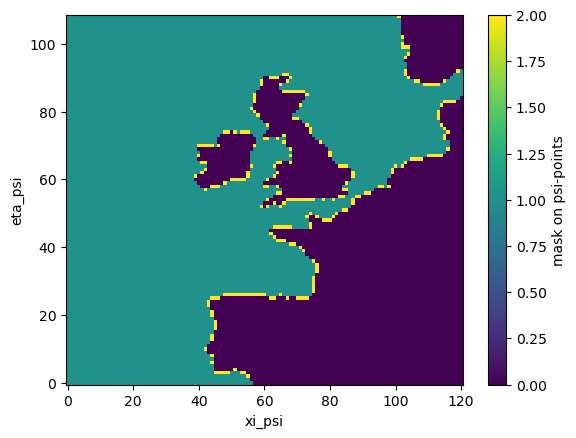

In [39]:
rst.mask_psi.plot()

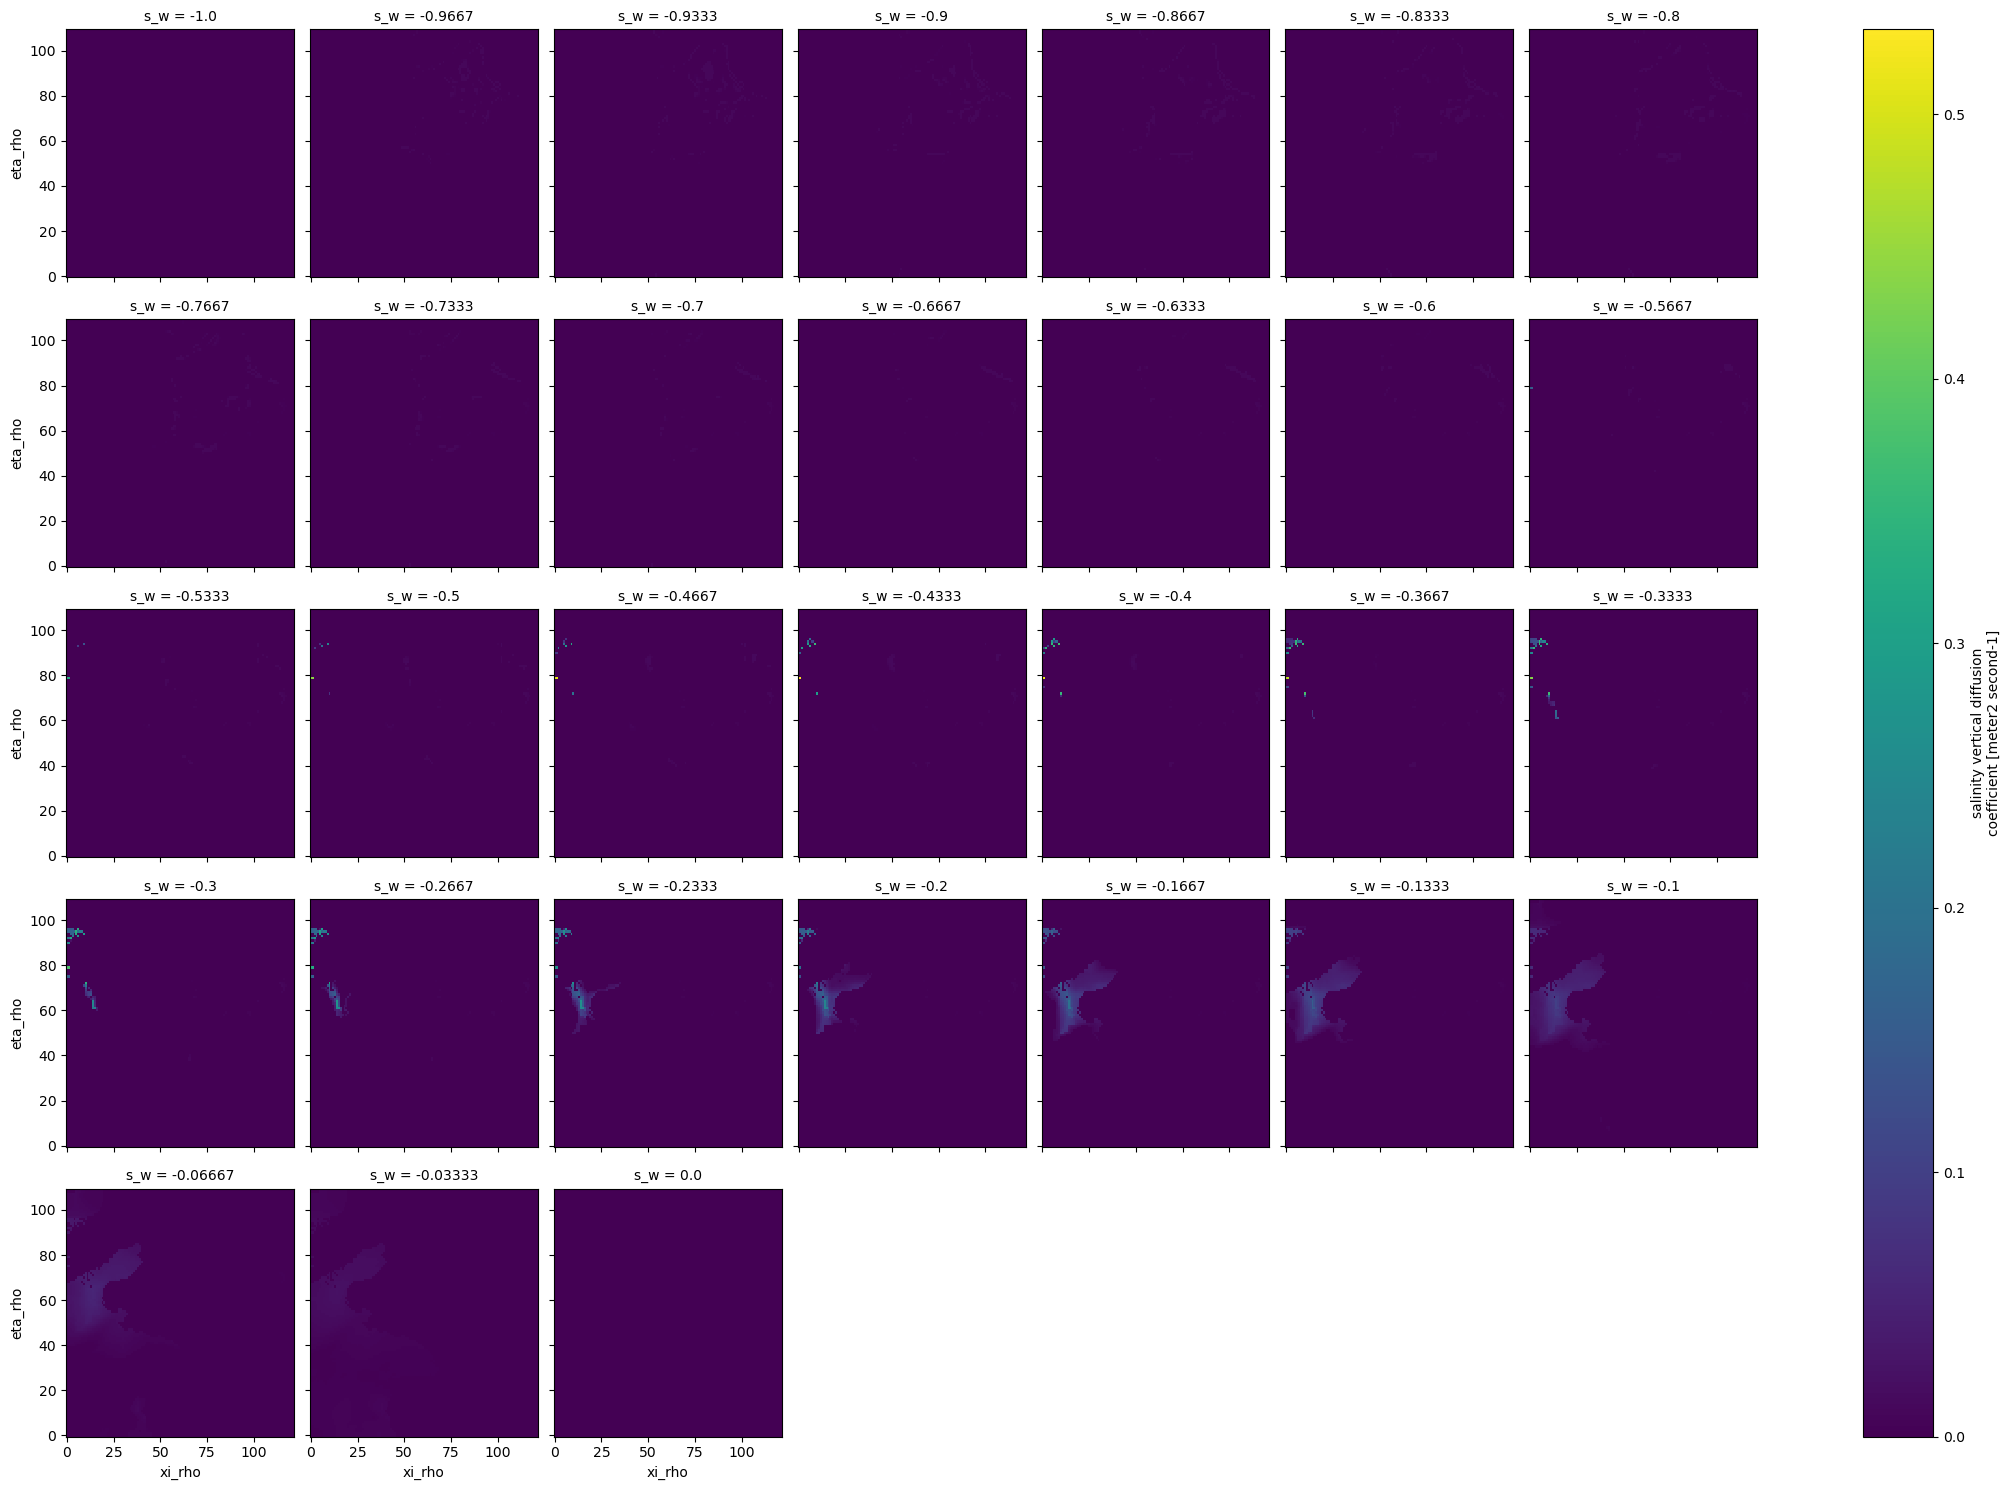

In [37]:
rst.AKs.plot(col = 's_w', col_wrap = 7)

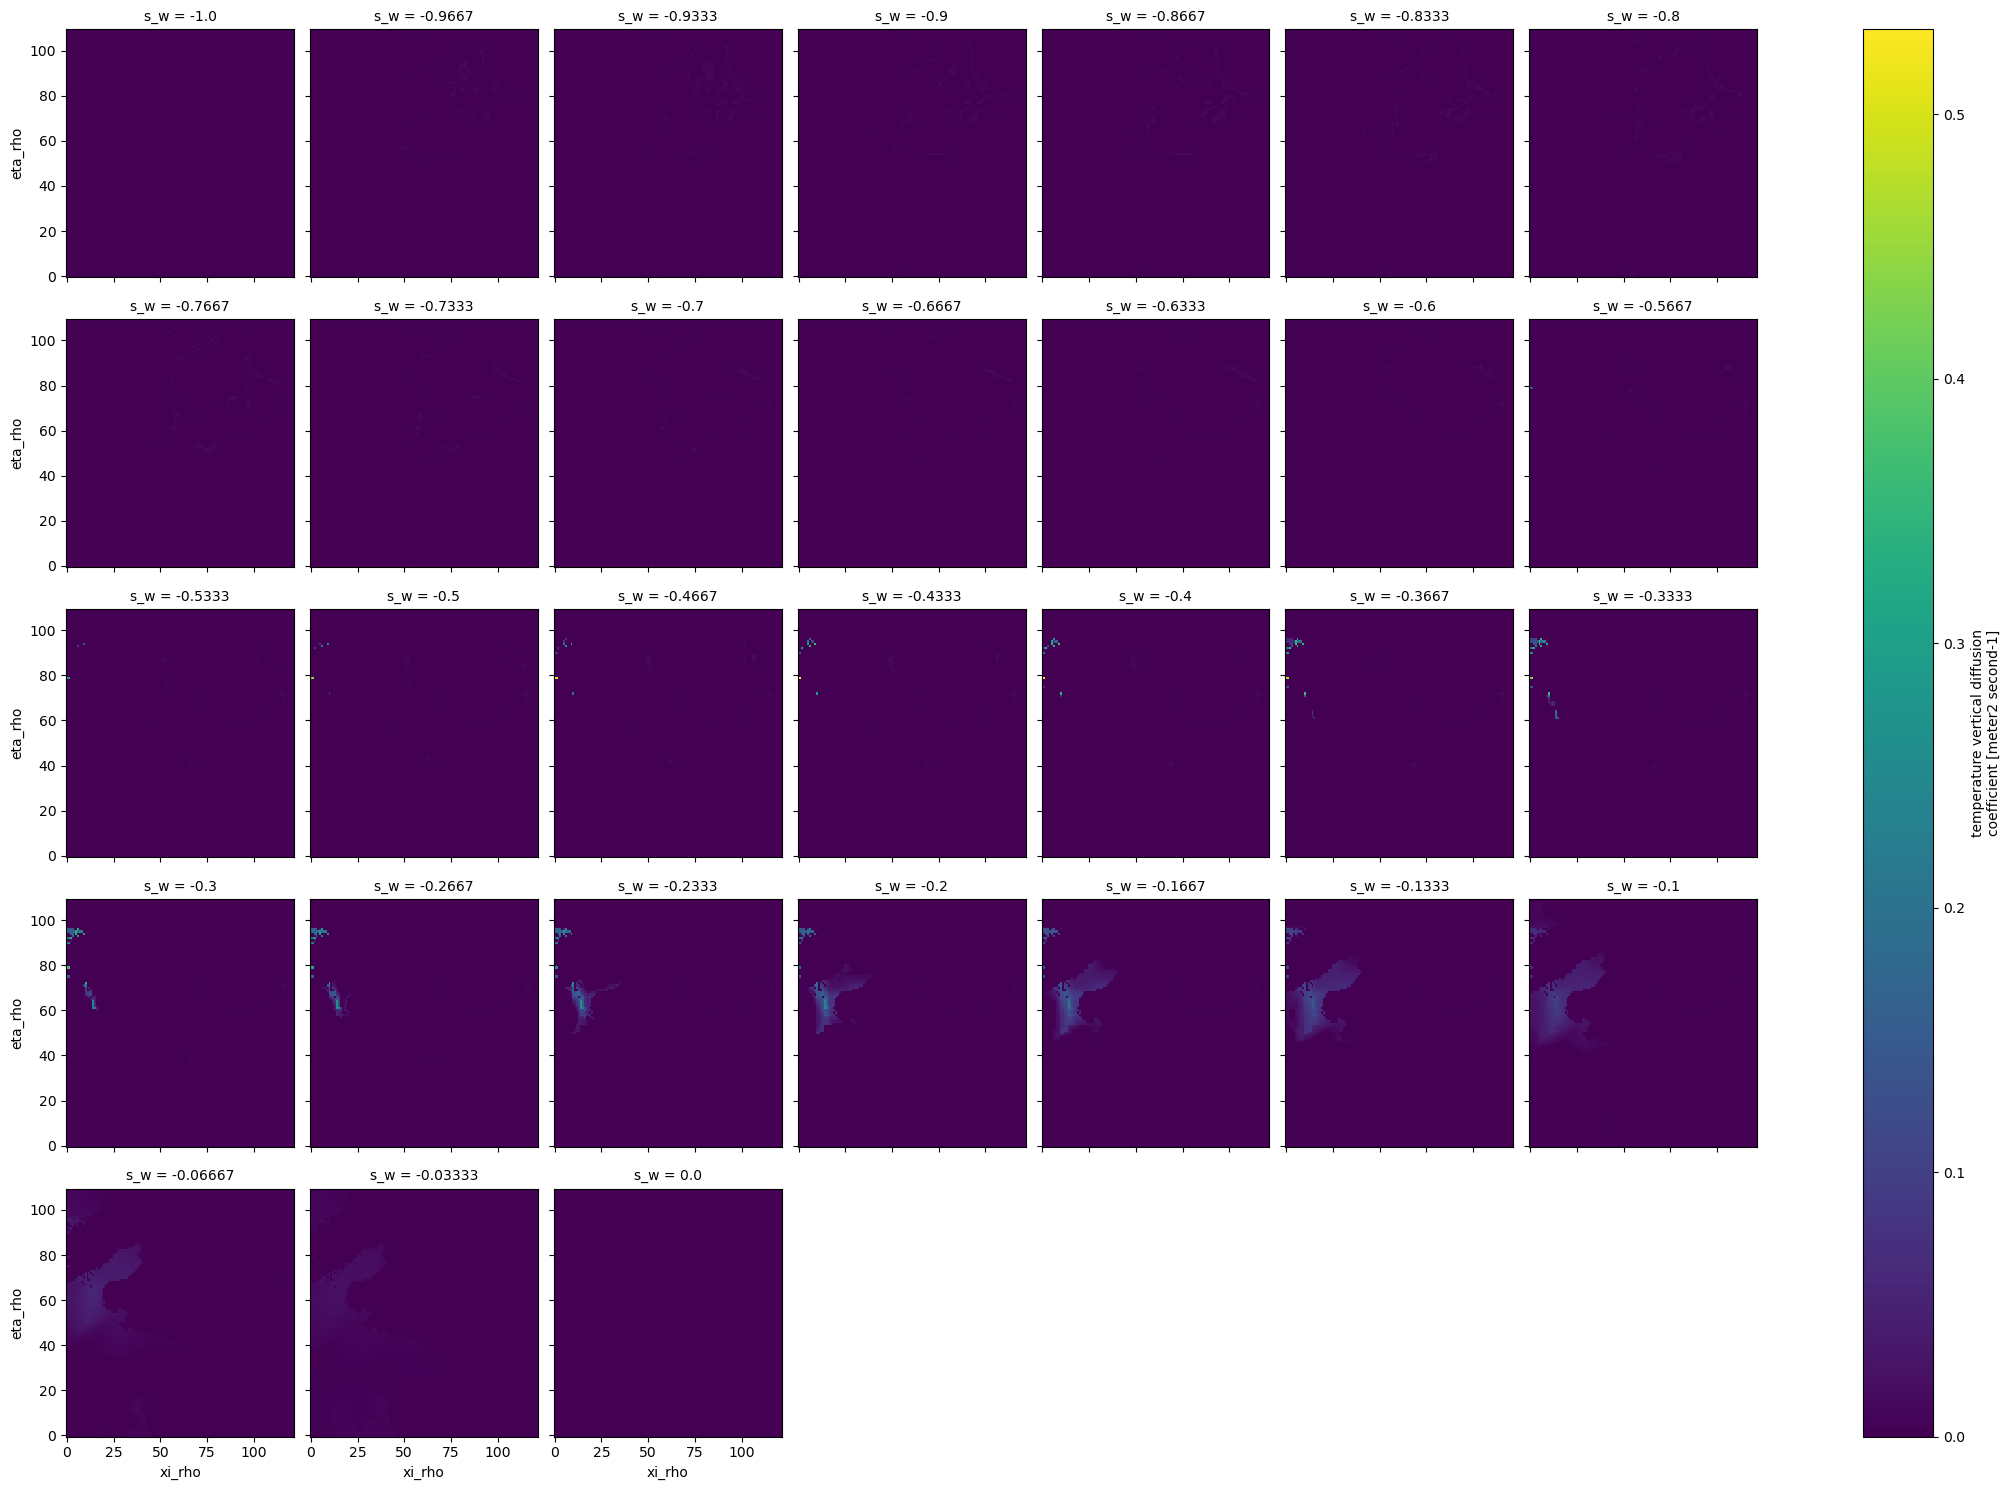

In [36]:
rst.AKt.plot(col = 's_w', col_wrap = 7)

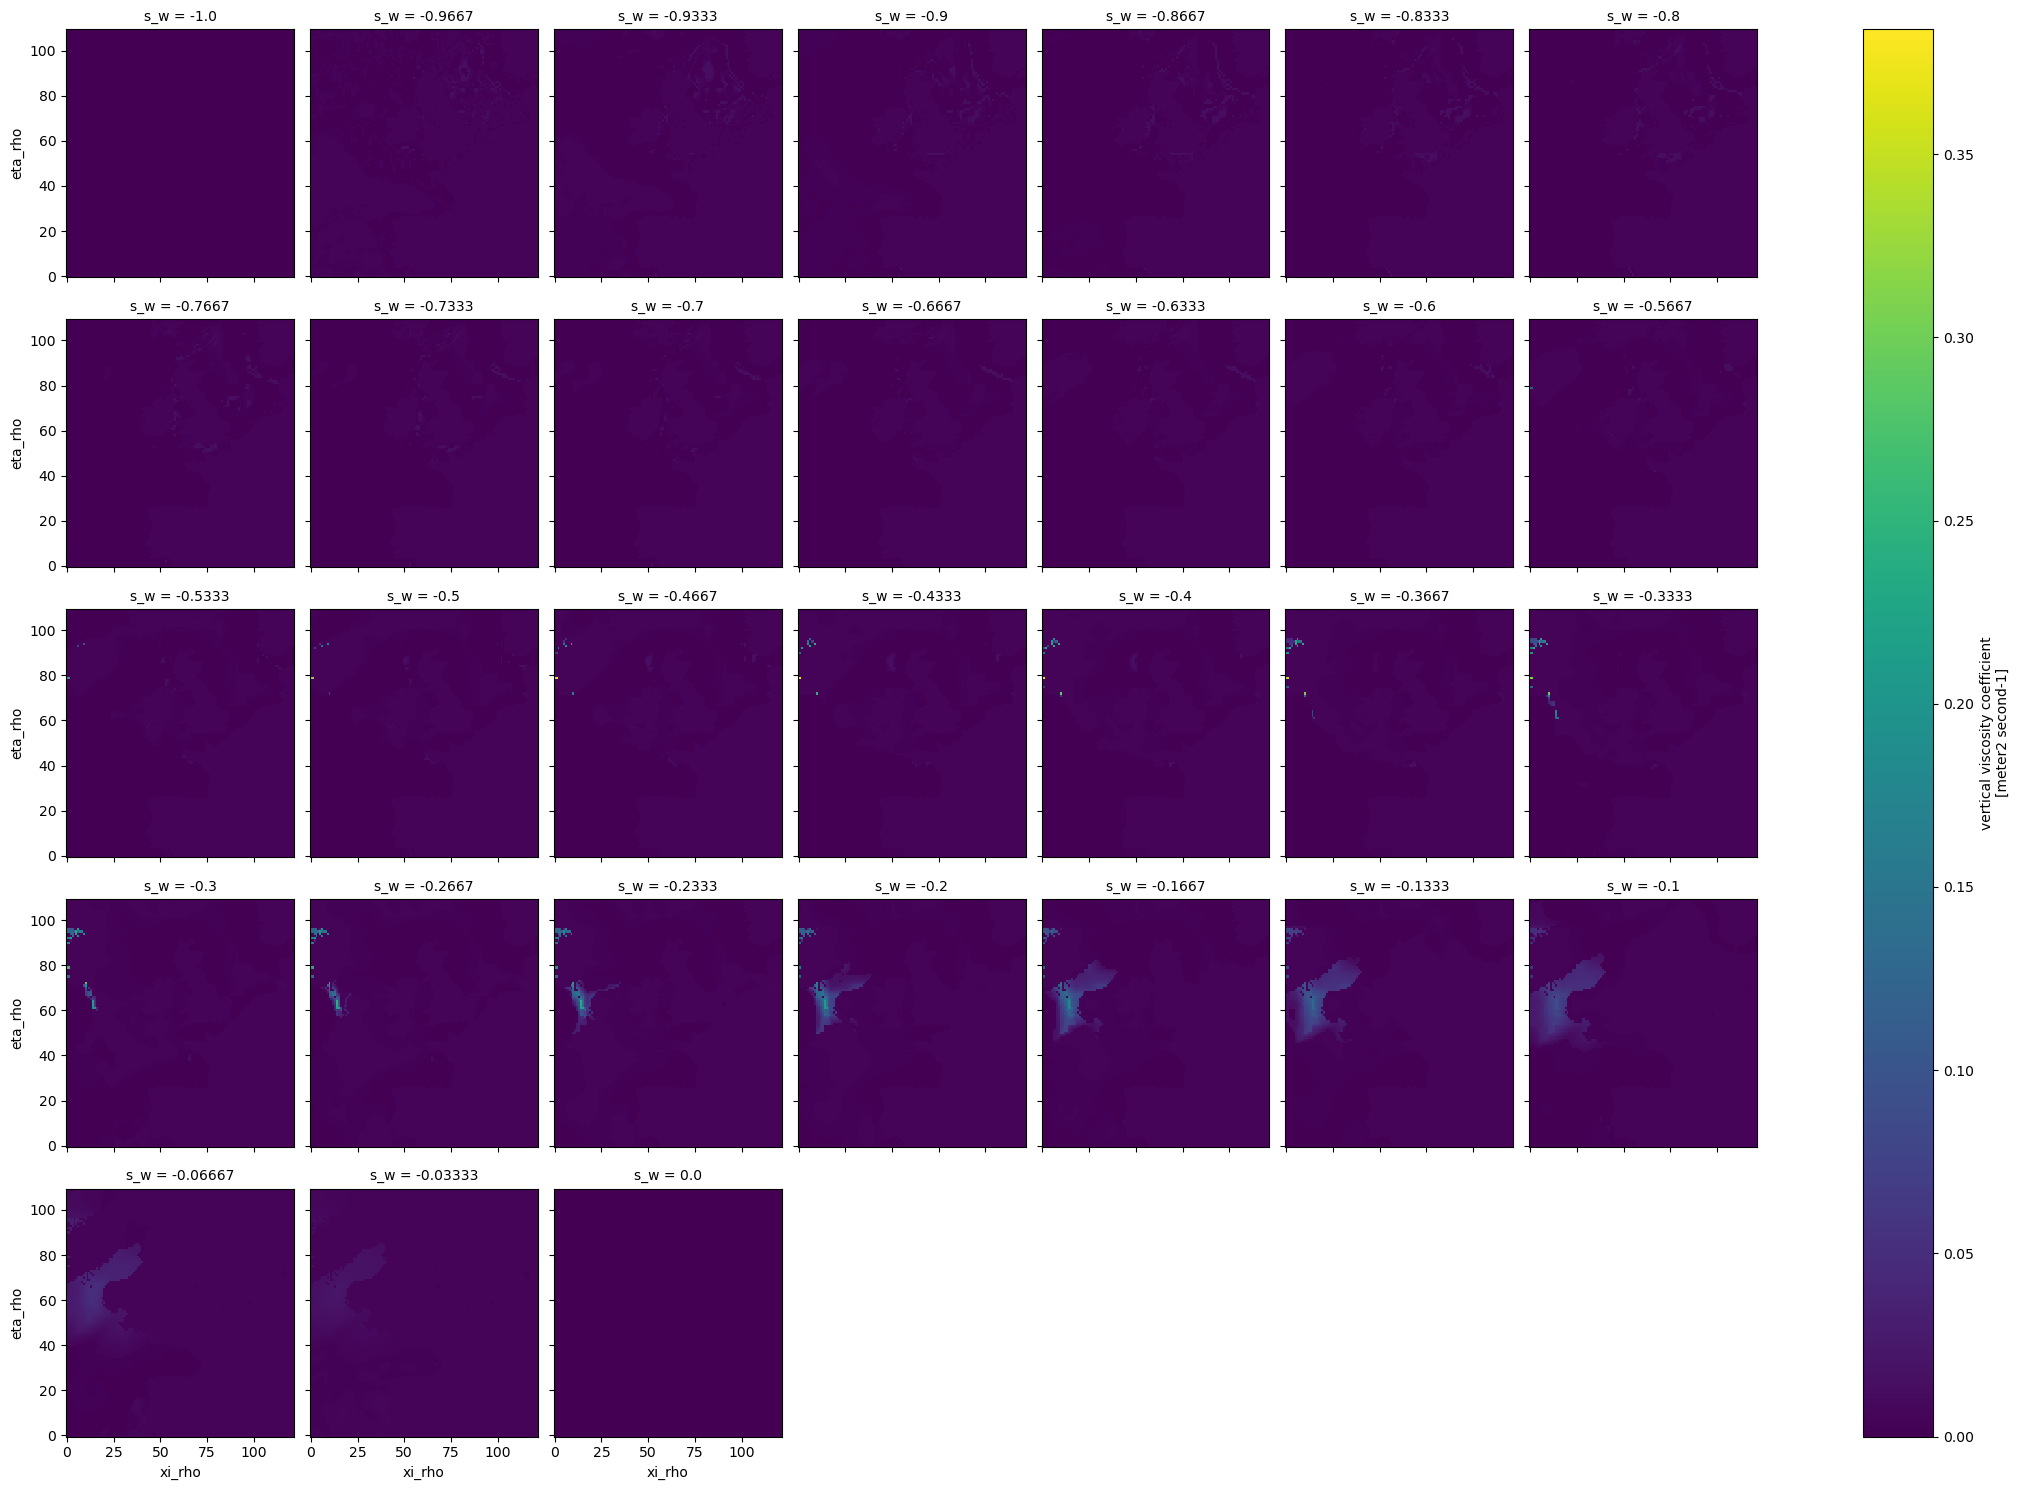

In [34]:
rst.AKv.plot(col = 's_w', col_wrap = 7)

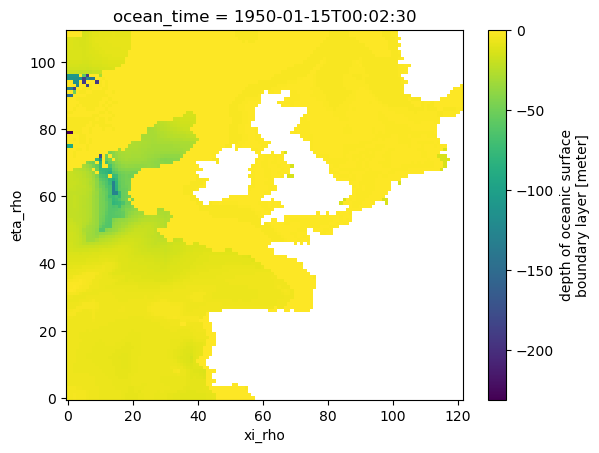

In [30]:
rst.Hsbl.plot()

In [17]:
rst.ocean_time.astype(int)/10**9

<xarray.DataArray 'ocean_time' (ocean_time: 1)>
array([-6.2981265e+08])
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 1950-01-16T12:02:30

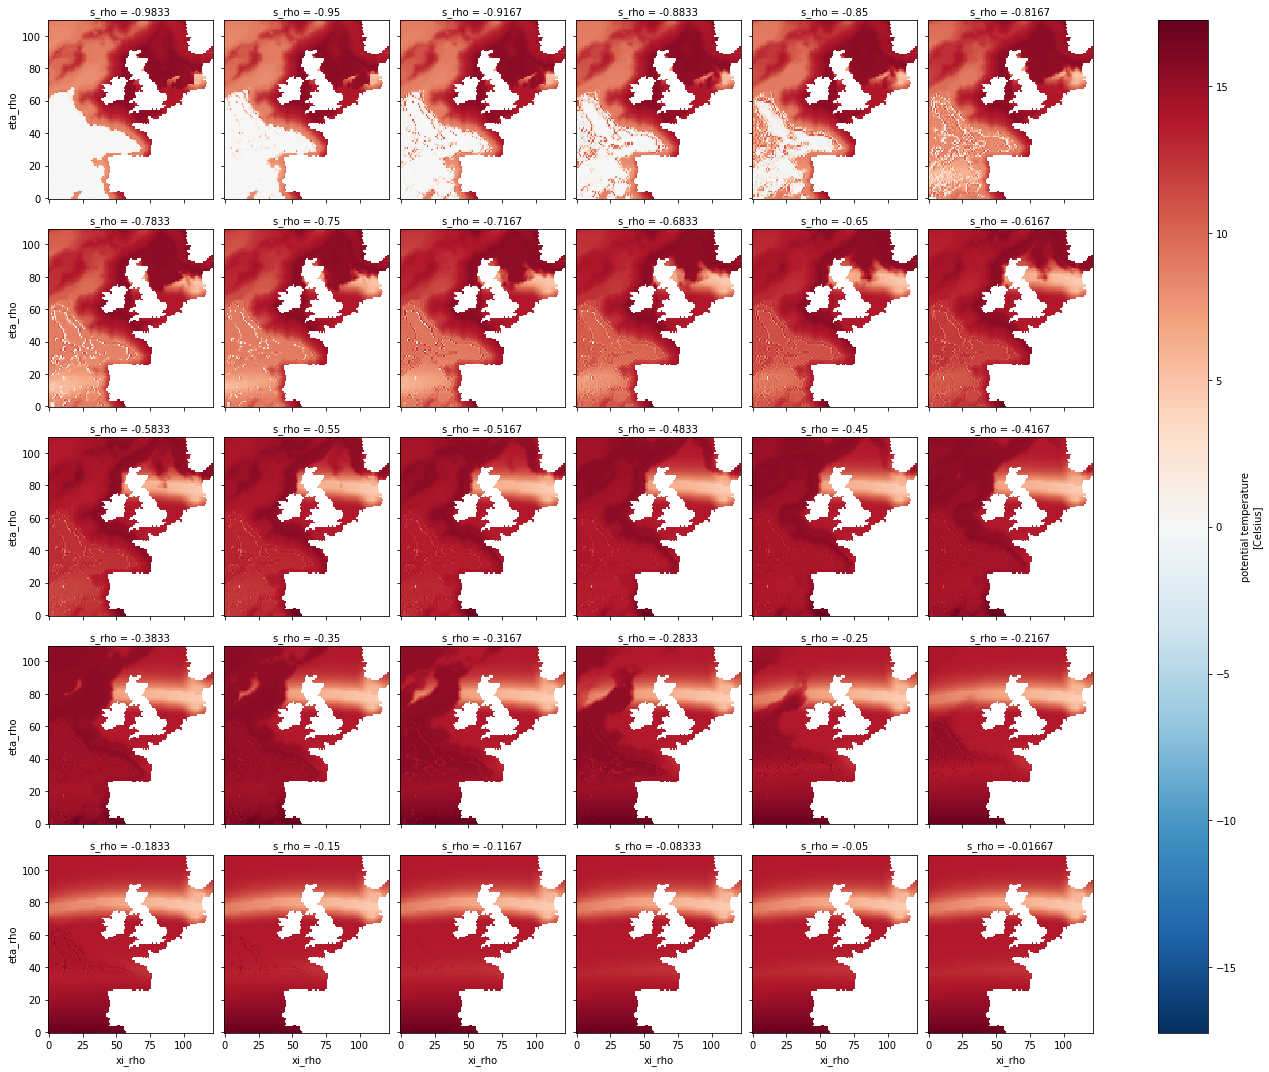

In [9]:
rst.temp.plot(col = 's_rho', col_wrap = 6)

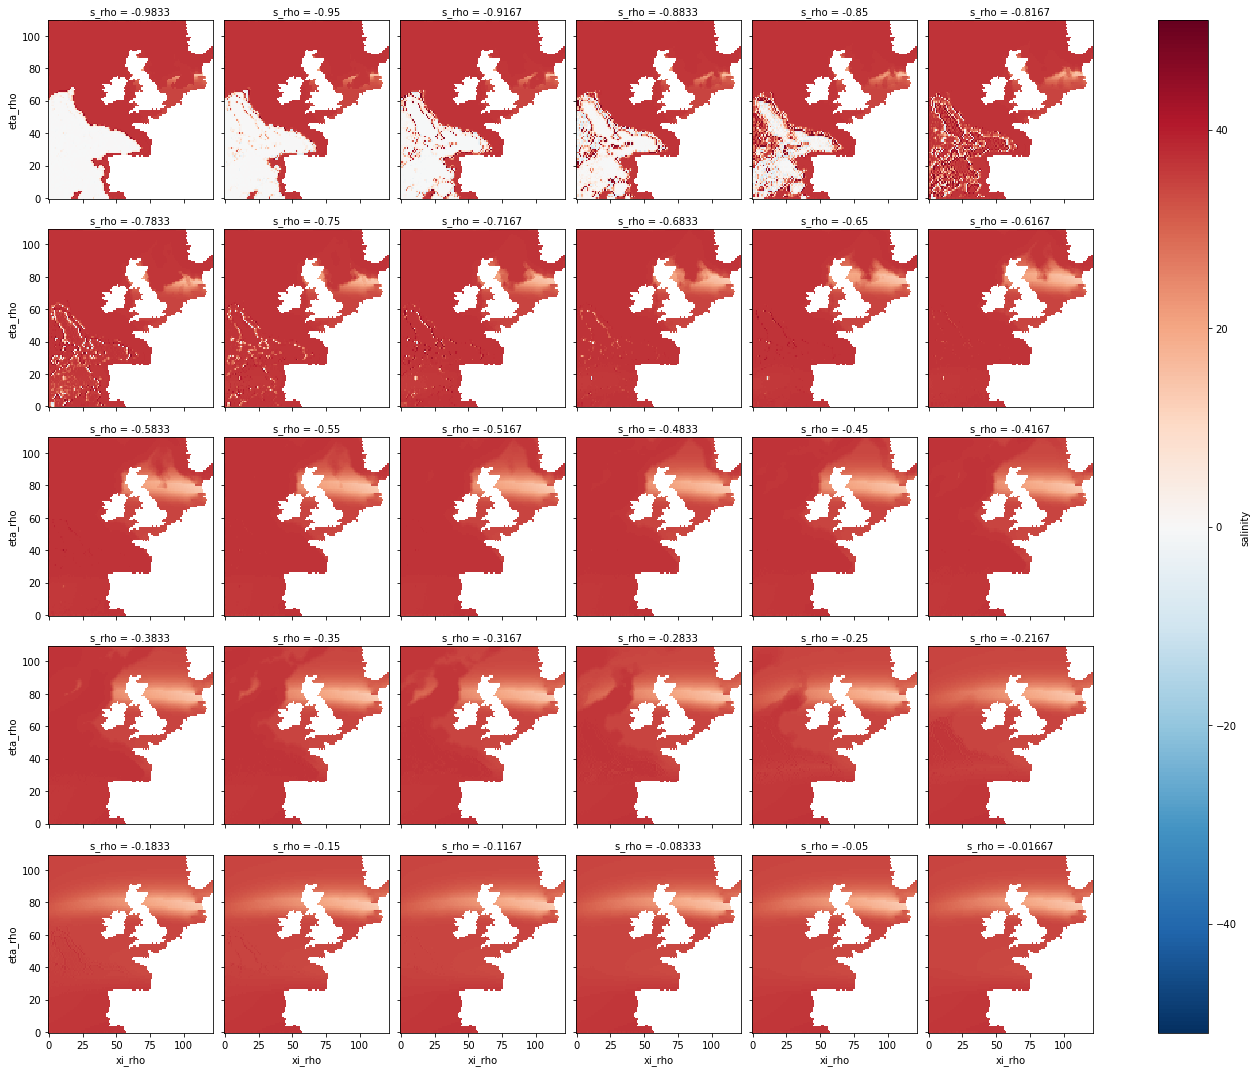

In [10]:
rst.salt.plot(col = 's_rho', col_wrap = 6)

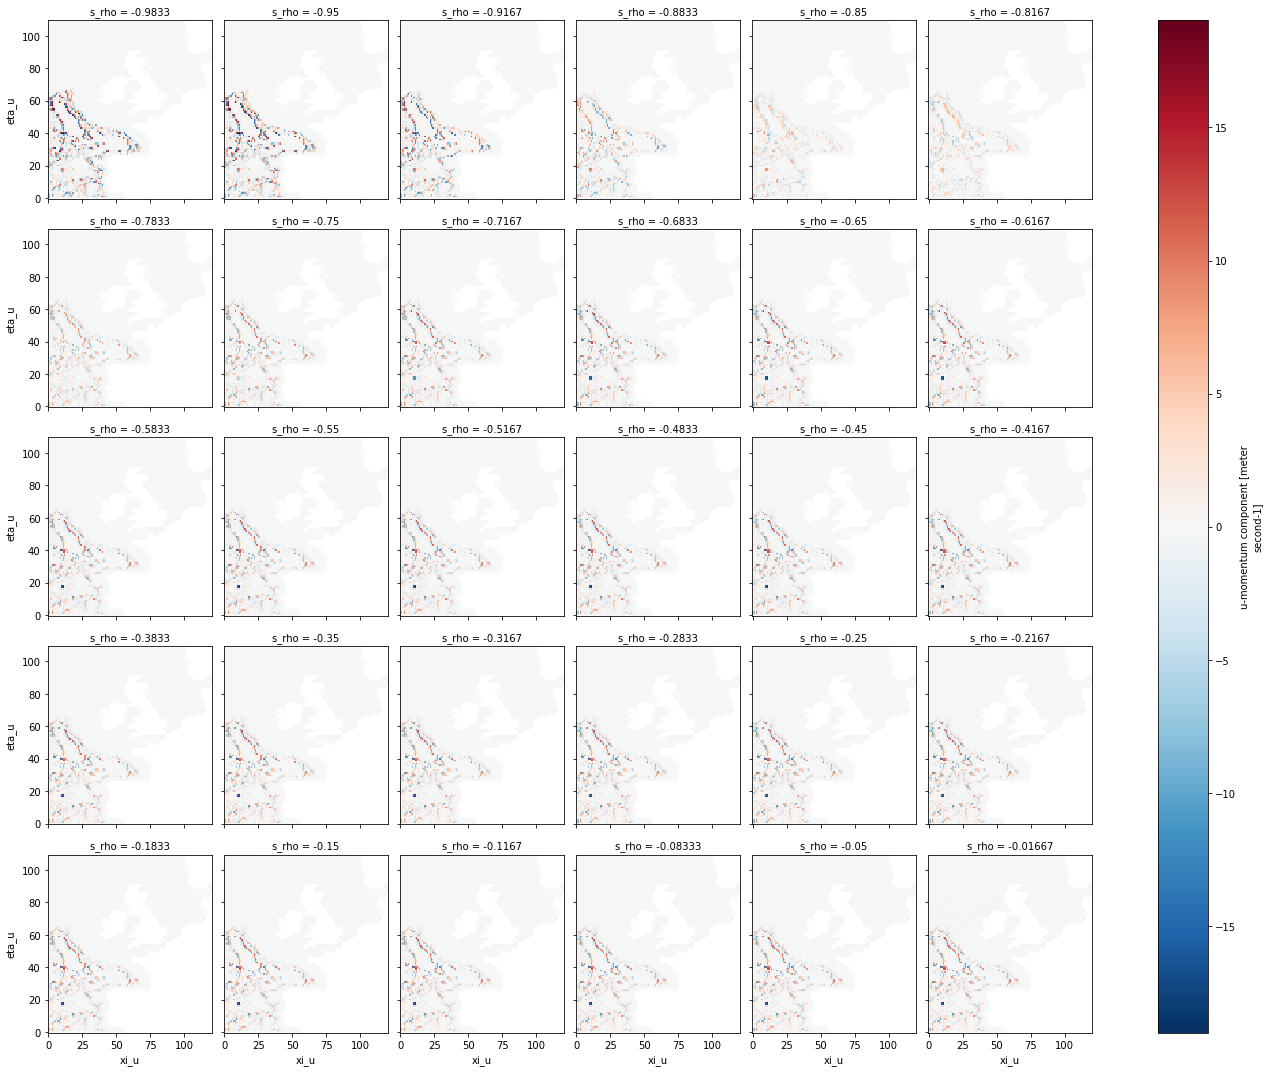

In [13]:
rst.u.plot(col = 's_rho', col_wrap = 6)

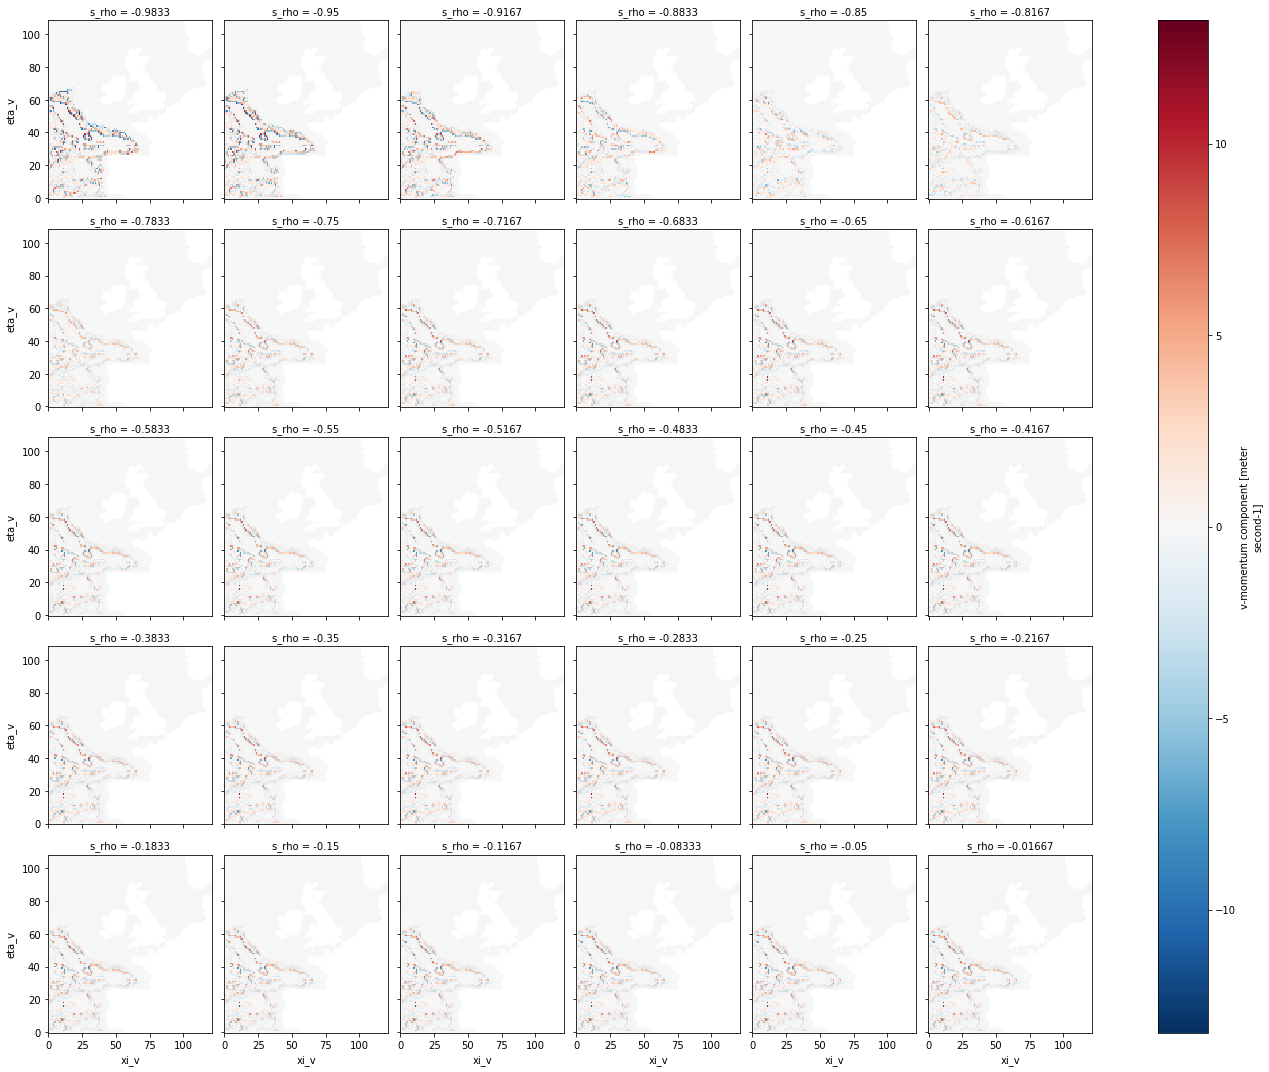

In [14]:
rst.v.plot(col = 's_rho', col_wrap = 6)